In [2]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [188]:
# # read data
# df2020 = pd.read_csv('IT Salary Survey EU  2020.csv')
# df2019 = pd.read_csv('IT Salary Survey EU 2019.csv')
# # df = data_pre(df)


In [189]:
# # rename the data columns
# df2020.columns = ["Timestamp", "Age", "Gender", "City", "Position", "Experience_Years", "German_Experience", "Seniority",
# "Main_Tech", "Other_Tech", "Salary", "Salary_Bonus", "Last_Year_Salary", "Last_Year_Salary_Bonus", "Vacations",
# "Employee_Status", "Contract_Duration", "Main_Language_Work", "Company_Size", "Company_Type", "Covid_Unemploy", "Covid_Part", "Covid_Support"]
# df2019.columns = ["Timestamp", "Age", "Gender", "City","Seniority", "Position", "Experience_Years", 
# "Main_Tech","Salary", "Salary_Bonus","Salary_Stock", "Last_Year_Salary", "Last_Year_Salary_Bonus","Last_Year_Salary_Stocks", "Vacations",
# "Num_Home_Office_Days", "Main_Language_Work","Company_Name","Company_Size", "Company_Type", "Contract_Duration", "Company_Business","Null"]

# df2020.drop([
# # drop all columns not in 2019 dataset
# 'German_Experience',
# 'Covid_Unemploy', 
# 'Covid_Part',
# 'Covid_Support',
# 'Employee_Status',
# "Other_Tech"
# ], axis=1, inplace=True)

# df2019.drop([
# # drop all columns not in 2020 dataset
# "Salary_Stock",
# "Last_Year_Salary_Stocks",
# "Num_Home_Office_Days",
# "Company_Name",
# "Company_Business",
# "Null"
# ], axis=1, inplace=True)
# print(df2019['Company_Type'].unique())
# df2019 = df2019[["Timestamp", "Age", "Gender", "City", "Position", "Experience_Years", "Seniority",
# "Main_Tech", "Salary", "Salary_Bonus", "Last_Year_Salary", "Last_Year_Salary_Bonus", "Vacations",
# "Contract_Duration", "Main_Language_Work", "Company_Size", "Company_Type"]]
# df = pd.concat([df2020, df2019])

['Startup' 'Product' nan 'Consulting / Agency' 'Bodyshop / Outsource'
 'University' 'Bank' 'Outsource']


In [190]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2244 entries, 0 to 990
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               2244 non-null   object 
 1   Age                     2108 non-null   float64
 2   Gender                  2234 non-null   object 
 3   City                    2244 non-null   object 
 4   Position                2237 non-null   object 
 5   Experience_Years        2228 non-null   object 
 6   Seniority               2217 non-null   object 
 7   Main_Tech               2103 non-null   object 
 8   Salary                  2243 non-null   float64
 9   Salary_Bonus            1359 non-null   object 
 10  Last_Year_Salary        1488 non-null   float64
 11  Last_Year_Salary_Bonus  871 non-null    object 
 12  Vacations               2116 non-null   object 
 13  Contract_Duration       2186 non-null   object 
 14  Main_Language_Work      2223 non-null   object

In [3]:
df1 = []
df = data_pre(df1)
df = df.apply(lambda x: x.astype(str).str.lower())

['Startup' 'Product' nan 'Consulting / Agency' 'Bodyshop / Outsource'
 'University' 'Bank' 'Outsource']


In [7]:
df['Position'].value_counts().iloc[30:60]

Position
designer (ui, ux)                             4
head of engineering                           4
tech lead                                     4
security engineer                             4
team lead                                     4
solutions architect                           3
database developer (dba)                      3
hardware engineer                             3
consultant                                    3
support engineer                              3
network engineer                              3
data analyst                                  3
it security                                   2
scrum master                                  2
platform engineer                             2
product analyst                               2
it manager                                    2
devops manager                                2
solution architect                            2
game developer                                1
student, software developer, da

Position
Backend Developer            427
Software Engineer            394
Data Scientist               232
Frontend Developer           157
DevOps                       110
Mobile Developer              99
Fullstack Developer           82
QA Engineer                   71
Data Engineer                 64
Manager                       64
QA                            56
Product Manager               48
ML Engineer                   42
Software Architect            40
Machine Learning Engineer     33
Business Analyst              20
Designer (UI/UX)              16
SRE                           14
Embedded Developer            14
Researcher                    13
SAP Consultant                11
Engineering Manager           10
Name: count, dtype: int64


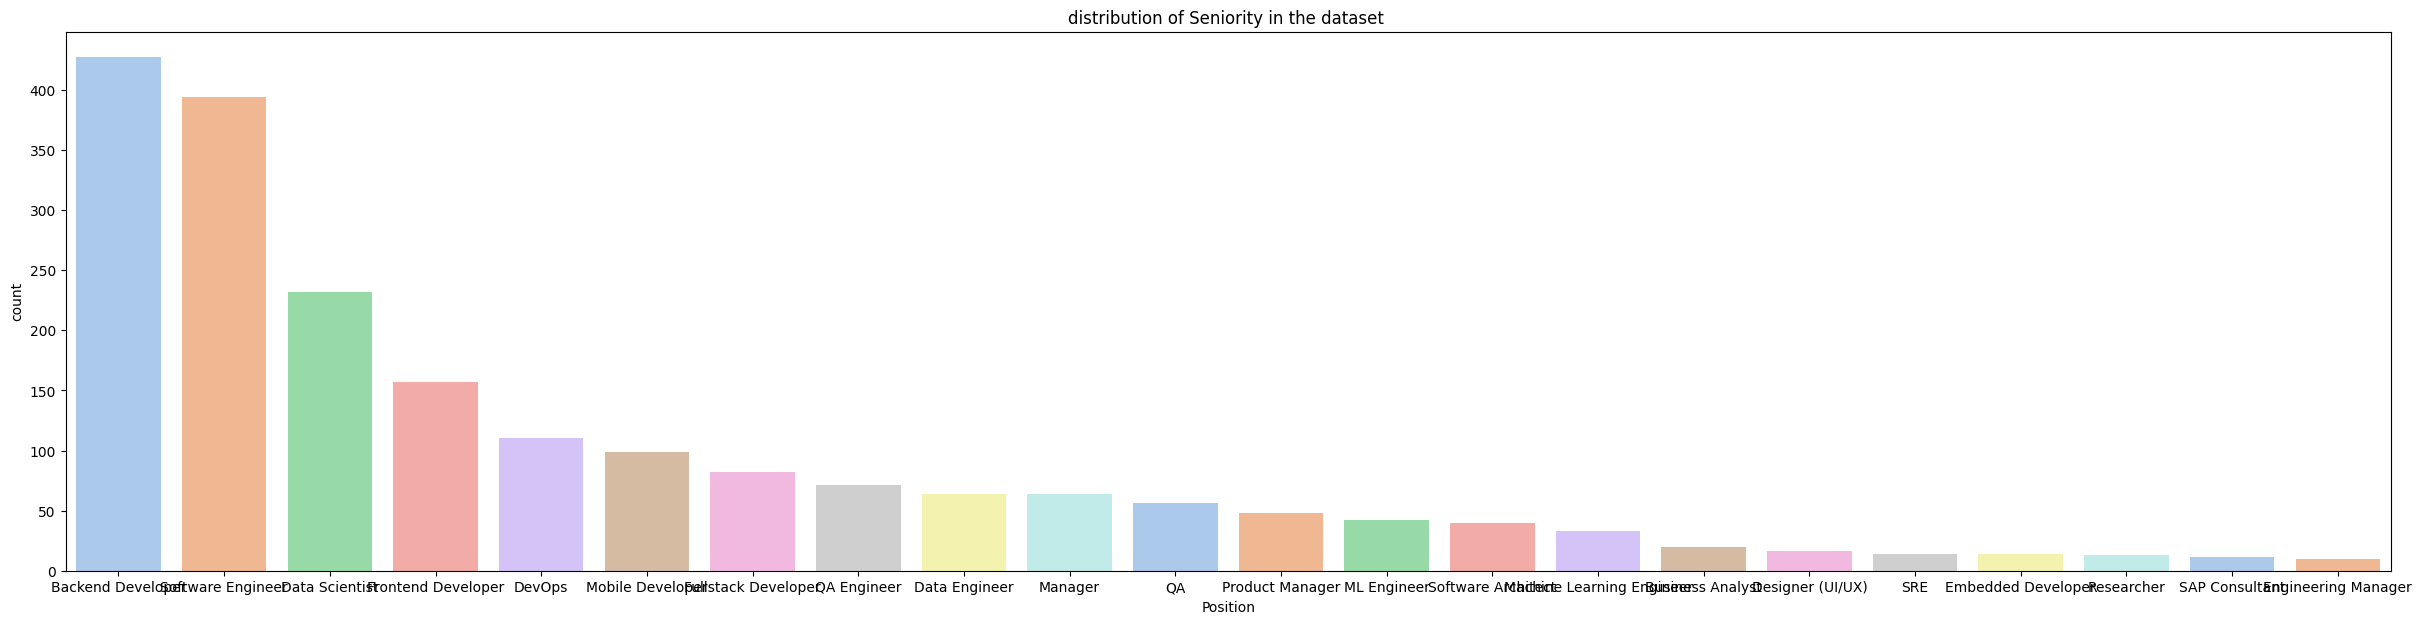

In [195]:
print(df['Position'].value_counts().iloc[:22])
plt.figure(figsize=(30,7))
sns.countplot(x = 'Position', data = df, palette = 'pastel',order=df['Position'].value_counts().iloc[:22].index)
plt.title('distribution of Seniority in the dataset ')
plt.show()

#### 1- Stating and refining the question.
##### Can we infer that the most paying position in Berlin is the highest paid in all other cities?  

#### 2- Exploring the data.

In [196]:
# Columns to explore are Position and Salary and Cities 
print(df[df['Salary'].isnull()==True].value_counts())
print(df[df['City'].isnull()==True].value_counts())
print(df[df['Position'].isnull()==True].value_counts())
################ there is no null value ################


Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


In [202]:
# Explore distribution of City
# get top 12 Cities (their value_counts > 6)
print(df['City'].value_counts().iloc[:11])

City
Berlin        1111
Munich         476
Frankfurt       94
Amsterdam       89
Hamburg         74
Stuttgart       41
Cologne         36
Moscow          17
Düsseldorf      16
Kyiv            11
London          10
Name: count, dtype: int64


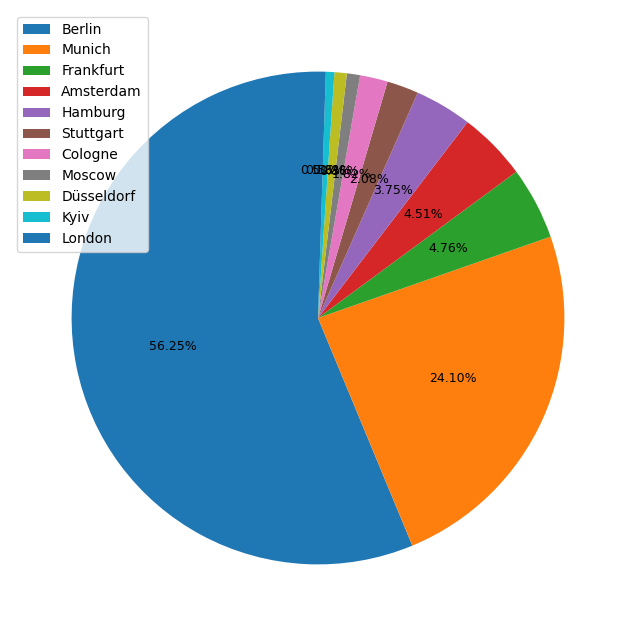

In [203]:
# Top 12 City on the survey 
plt.figure(figsize=(8,8))
df['City'].value_counts().iloc[:11].plot.pie(autopct="%1.2f%%",fontsize=9,startangle=90,labels=['']*11)
plt.ylabel("")
plt.legend(loc='upper left',labels=df['City'].value_counts().iloc[:11].index)
plt.show()

In [30]:
# get the top 12 cities 
city_remain_values = ['Berlin','Munich','Frankfurt','Amsterdam','Hamburg','Stuttgart','Cologne','Moscow','Düsseldorf','Kyiv','London']
df =df.loc[df['City'].isin(city_remain_values)]

In [107]:
# Explor Positions in Berlin
df_Mu_pos = df.copy()
df_Mu_pos = df_Mu_pos[df_Mu_pos['City']=='Munich']
# find the distribution between the position and avg Salary

In [110]:
# df_Mu_pos[df_Mu_pos['Salary']==300000.0]

,Timestamp,Age,Gender,City,Position,Experience_Years,German_Experience,Seniority,Main_Tech,Other_Tech,Salary,Last_Year_Salary,Employee_Status,Contract_Duration,Main_Language_Work,Company_Size,Company_Type
576,25/11/2020 13:26:21,24.0,Male,Munich,Data Scientist,1,1,Junior,C++,"Python, C/C++, Swift, Java / Scala, R, SQL, Go...",300000.0,NaN,Full-time employee,NaN,English,101-1000,Startup


In [ ]:
# Explor Positions in Berlin
df_Berlin_pos = df.copy()
df_Berlin_pos = df_Berlin_pos[df_Berlin_pos['City']=='Berlin']
# find the distribution between the position and avg Salary

In [1]:
# find the frequent position in the data 
df_Berlin_pos['Seniority'].value_counts()


NameError: name 'df_Berlin_pos' is not defined

In [ ]:
# remove all values that appear little in company type 
company_remain_values = ['Product','Startup','Consulting / Agency','Bank','Media']
df =df.loc[df['Company_Type'].isin(company_remain_values)]

In [33]:
# start with Senior as we have alot of data (Senior)
df_Berlin_pos = df_Berlin_pos[df_Berlin_pos['Seniority']=='Senior']

In [52]:
position_salary = df_Berlin_pos['Salary'].groupby(df_Berlin_pos['Position']).sum()and
position_salary.sort_values(ascending=False,inplace=True)
print(position_salary)
print(df_Berlin_pos['Position'].value_counts())

Position
Software Engineer                         7516350.0
Backend Developer                         5225973.0
Frontend Developer                        2676560.0
Mobile Developer                          1366700.0
Data Scientist                            1291550.0
QA Engineer                               1177900.0
DevOps                                    1147800.0
Product Manager                            658000.0
Data Engineer                              603000.0
Designer (UI/UX)                           466400.0
ML Engineer                                400000.0
Data Analyst                               160000.0
Fullstack Developer                        132000.0
Consultant                                 100000.0
Senior Data Engineer                        90000.0
Security Engineer                           85000.0
Embedded Software Engineer                  78000.0
SRE                                         75000.0
BI Developer / Data Engineer                75000.0
Clo

In [64]:

position_avg_salary = (position_salary/ df_Berlin_pos['Position'].value_counts()).sort_values(ascending = False)
top_position = position_avg_salary.iloc[:13].index.to_list()


Position
Software Engineer                         7516350.0
Backend Developer                         5225973.0
Frontend Developer                        2676560.0
Mobile Developer                          1366700.0
Data Scientist                            1291550.0
QA Engineer                               1177900.0
DevOps                                    1147800.0
Product Manager                            658000.0
Data Engineer                              603000.0
Designer (UI/UX)                           466400.0
ML Engineer                                400000.0
Data Analyst                               160000.0
Fullstack Developer                        132000.0
Consultant                                 100000.0
Senior Data Engineer                        90000.0
Security Engineer                           85000.0
Embedded Software Engineer                  78000.0
SRE                                         75000.0
BI Developer / Data Engineer                75000.0
Clo

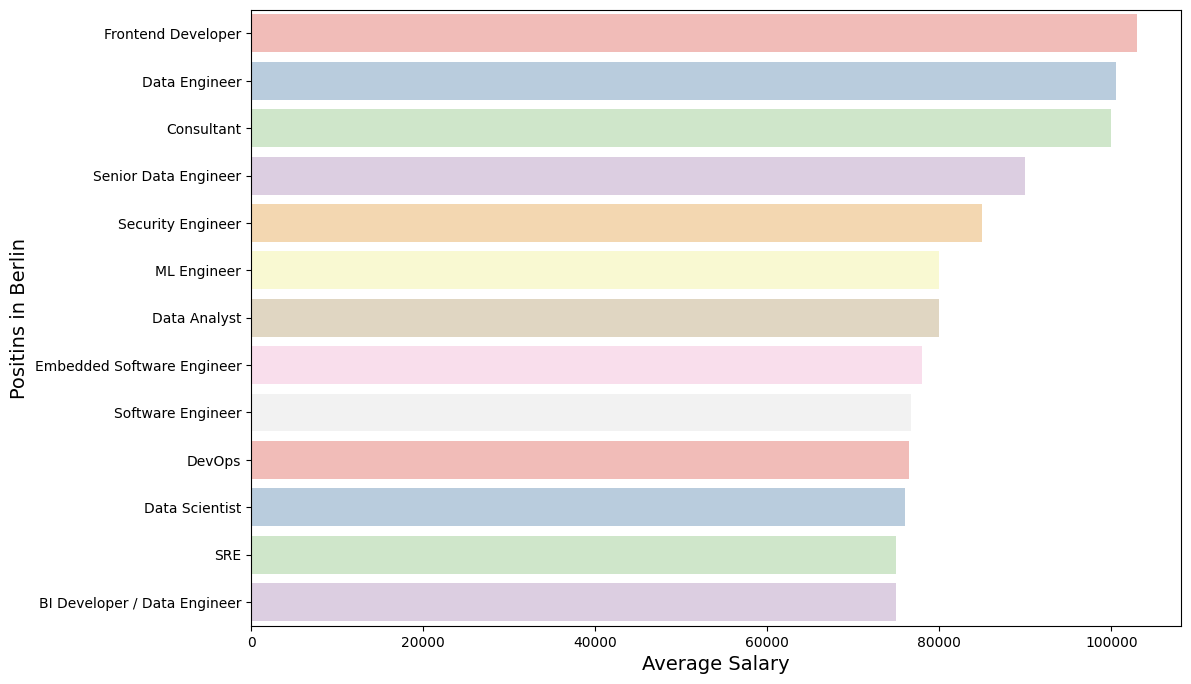

In [73]:
plt.figure(figsize=(12,8))
print(position_salary)
sns.barplot(y=top_position,x= position_avg_salary[:13],palette='Pastel1')
plt.xlabel("Average Salary",fontsize=14)
plt.ylabel("Positins in Berlin",fontsize=14)
plt.show()

#### 3- Format Modeling to answer the question 

#### 4- Interpreting the results. 

#### 5- Communicating the results.